## Deep Learning Lab-3
### Universidad del Valle de Guatemala
#### Nombres: Pablo Gonzalez 20362
#### Jose Hernandez: 20053

In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, SimpleRNN
from tensorflow.keras.layers import LSTM

In [33]:
data = pd.read_csv('data/SunSpots.csv')

##### Visualizacion de datos

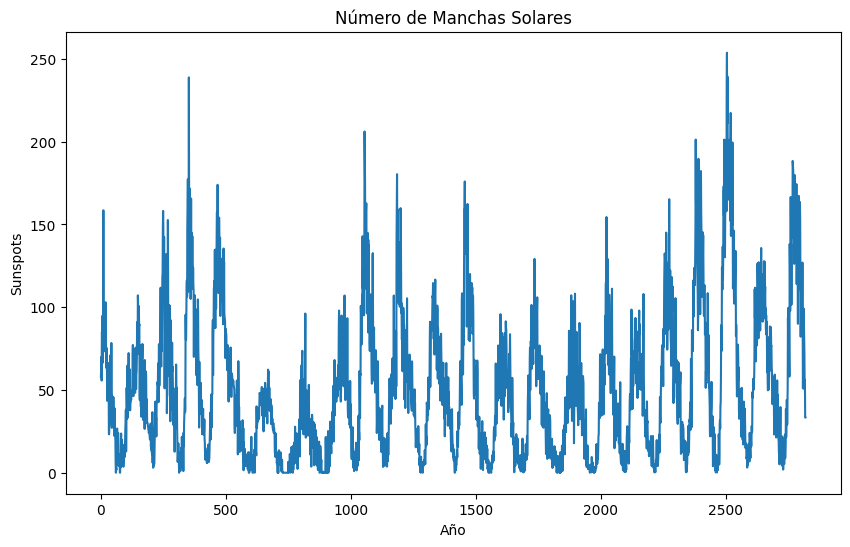

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(data['Sunspots'])
plt.title('Número de Manchas Solares')
plt.xlabel('Año')
plt.ylabel('Sunspots')
plt.show()


#### Manejo de datos

Se realizo un manejo de datos para el primer modelo

In [35]:
# Divide la columna 'Month' en 'year' y 'month'
data['year'] = data['Month'].str.split('-').str[0].astype(int)
data['month'] = data['Month'].str.split('-').str[1].astype(int)

data.rename(columns={'Month': 'date'}, inplace=True)

In [36]:
data

,date,Sunspots,year,month
0,1749-01,58.0,1749,1
1,1749-02,62.6,1749,2
2,1749-03,70.0,1749,3
3,1749-04,55.7,1749,4
4,1749-05,85.0,1749,5
...,...,...,...,...
2815,1983-08,71.8,1983,8
2816,1983-09,50.3,1983,9
2817,1983-10,55.8,1983,10
2818,1983-11,33.3,1983,11


In [37]:
data.dtypes

date         object
Sunspots    float64
year          int32
month         int32
dtype: object

### Feed Forward NN (Red Simple)


In [38]:
X = data[['year','month']]
y = data[['Sunspots']]
X = np.asarray(X)
y = np.asarray(y)

In [39]:
from sklearn.model_selection import train_test_split
#X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [42]:
from keras.layers import Dropout
from keras.regularizers import l2
batched_model = Sequential([
    Dense(64, input_shape=(2,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
]);

In [43]:
batched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_squared_error']
)

In [44]:
batched_model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/100


53/53 - 4s - loss: 4652.8599 - mean_squared_error: 4652.8599 - val_loss: 4175.4976 - val_mean_squared_error: 4175.4976 - 4s/epoch - 71ms/step
Epoch 2/100
53/53 - 0s - loss: 4615.1343 - mean_squared_error: 4615.1343 - val_loss: 4163.6313 - val_mean_squared_error: 4163.6313 - 188ms/epoch - 4ms/step
Epoch 3/100
53/53 - 0s - loss: 4591.7144 - mean_squared_error: 4591.7144 - val_loss: 4187.5117 - val_mean_squared_error: 4187.5117 - 178ms/epoch - 3ms/step
Epoch 4/100
53/53 - 0s - loss: 4557.3223 - mean_squared_error: 4557.3223 - val_loss: 4098.2329 - val_mean_squared_error: 4098.2329 - 180ms/epoch - 3ms/step
Epoch 5/100
53/53 - 0s - loss: 4521.5347 - mean_squared_error: 4521.5347 - val_loss: 4139.5098 - val_mean_squared_error: 4139.5098 - 165ms/epoch - 3ms/step
Epoch 6/100
53/53 - 0s - loss: 4474.5181 - mean_squared_error: 4474.5181 - val_loss: 4138.7549 - val_mean_squared_error: 4138.7549 - 176ms/epoch - 3ms/step
Epoch 7/100
53/53 - 0s - loss: 4433.8022 - mean_squared_error: 4433.8022 - val

In [45]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# make predictions
train_predict = batched_model.predict(X_train)
test_predict = batched_model.predict(X_test)
# Mean square error
print_error(y_train, y_test, train_predict, test_predict)


18/18 [==============================] - 0s 1ms/step
Train RMSE: 39.619 RMSE
Test RMSE: 41.402 RMSE


Como se puede visualizar el modelo cuenta con RMSE de 39.619 en el train y en el test de 41.402 lo cual es un rmse muy grande pero es lo que se espera de este modelo a no ser un modelo el cual tenga memoria sobre la data que esta trabajando.

### Predicciones

In [46]:
test_predict

array([[59.40308   ],
       [67.068184  ],
       [-2.4385035 ],
       [60.900944  ],
       [79.623924  ],
       [60.956806  ],
       [38.148544  ],
       [79.623924  ],
       [63.395664  ],
       [-5.60499   ],
       [55.93728   ],
       [40.513695  ],
       [53.258247  ],
       [77.24418   ],
       [-4.7516537 ],
       [51.765404  ],
       [79.623924  ],
       [78.3822    ],
       [64.802475  ],
       [54.46353   ],
       [79.623924  ],
       [ 8.127333  ],
       [51.622757  ],
       [14.935232  ],
       [35.83276   ],
       [52.439613  ],
       [34.693554  ],
       [57.926388  ],
       [57.491425  ],
       [-4.0498114 ],
       [59.5171    ],
       [41.89615   ],
       [54.17321   ],
       [ 4.2130547 ],
       [44.430954  ],
       [40.608177  ],
       [37.902943  ],
       [54.64859   ],
       [60.85824   ],
       [ 3.0939114 ],
       [58.823135  ],
       [63.539436  ],
       [79.623924  ],
       [66.9199    ],
       [79.204056  ],
       [50

### Red neuronal RNN

In [59]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(
        hidden_units
        , input_shape=input_shape
        , activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [60]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = pd.read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [61]:
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
time_steps = 12

trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [62]:
model2 = create_RNN(
    hidden_units=3
    , dense_units=1
    , input_shape=(time_steps,1)
    , activation=['tanh', 'tanh']
)
model2.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.0102 - 1s/epoch - 6ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0075 - 275ms/epoch - 1ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0067 - 303ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0061 - 291ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0057 - 278ms/epoch - 1ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0054 - 276ms/epoch - 1ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0051 - 270ms/epoch - 1ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0048 - 269ms/epoch - 1ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0046 - 283ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0045 - 317ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0044 - 279ms/epoch - 1ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0045 - 286ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0042 - 283ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0041 - 270ms/epoch - 1ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0041 - 272ms/epoch - 1ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

In [63]:
train_predict = model2.predict(trainX)
test_predict = model2.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 3ms/step
Train RMSE: 0.062 RMSE
Test RMSE: 0.082 RMSE


Como se puede visualizar este es un buen modelo ya que presenta un RMSE de 0.062 en el train y un RMSE  de 0.08 en el test lo cual nos puede decir que este es un modelo muy bueno para predcir la serie de tiempo que se tiene

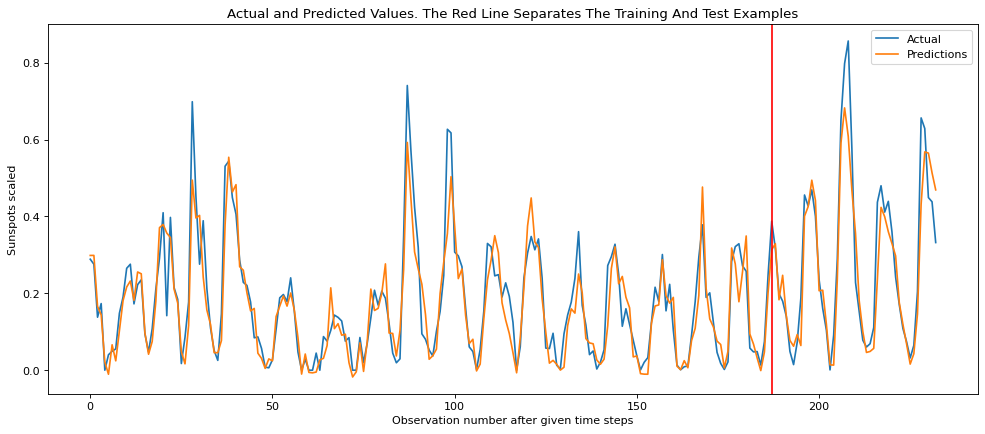

In [64]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

Como se puede ver graficamente el modelo se apega mucho a los datos lo cual quiere decir que es un buen modelo para predecir las tendencias de los sunspots

### Red neuronal LSTM

In [65]:
def create_LSTM(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(
        hidden_units,
        input_shape=input_shape,
        activation=activation[0]
    ))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [66]:
model_lstm = create_LSTM(
    hidden_units=3,
    dense_units=1,
    input_shape=(time_steps, 1),
    activation=['tanh', 'tanh']
)

In [73]:
model_lstm.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 0s - loss: 0.0036 - 463ms/epoch - 2ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0035 - 443ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0035 - 433ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0035 - 436ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0036 - 430ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0035 - 426ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0036 - 432ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0034 - 422ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0034 - 423ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0035 - 433ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0035 - 426ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0034 - 439ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0035 - 442ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0035 - 477ms/epoch - 3ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0035 - 432ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0

In [74]:
train_predict_lstm = model_lstm.predict(trainX)
test_predict_lstm = model_lstm.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [75]:
print_error(trainY, testY, train_predict_lstm, test_predict_lstm)

Train RMSE: 0.057 RMSE
Test RMSE: 0.079 RMSE


Como se puede visualizar este es un buen modelo ya que presenta un RMSE de 0.057 en el train y un RMSE  de 0.079 en el test lo cual nos puede decir que este es un modelo muy bueno para predcir la serie de tiempo que se tiene y con respecto a los otros dos modelos este es el que presenta un menor RMSE

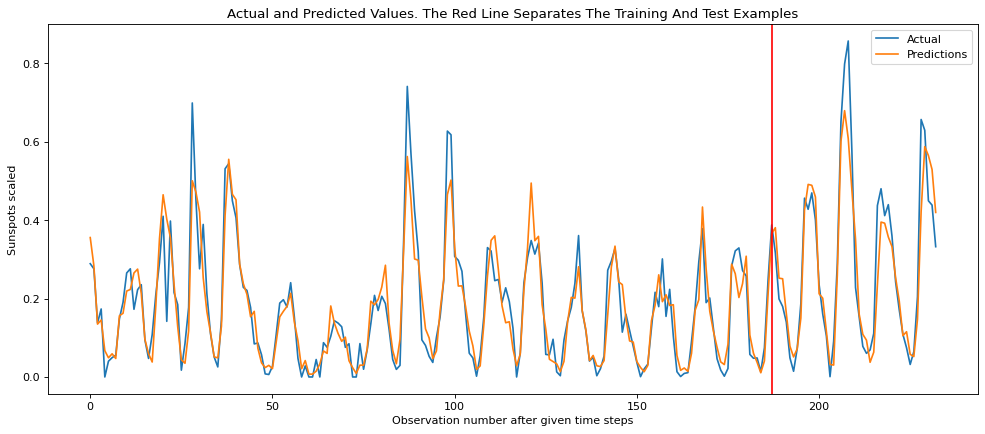

In [76]:
plot_result(trainY, testY, train_predict_lstm, test_predict_lstm)

Como se puede ver graficamente el modelo se apega mucho a los datos lo cual quiere decir que es un buen modelo para predecir las tendencias de los sunspots

### Análisis de Modelos para Predicción de Series de Tiempo

En el contexto de resolver un problema de predicción de series de tiempo, se han evaluado tres arquitecturas de modelos diferentes: un Modelo Batched MLP (Multi-Layer Perceptron), un Modelo Simple RNN y un Modelo LSTM (Long Short-Term Memory). Cada modelo ha sido entrenado y evaluado en términos de su rendimiento utilizando la métrica de error cuadrático medio (RMSE) en los conjuntos de entrenamiento y prueba.

#### Modelo Batched MLP

- **Pros:**
  - Capacidad para manejar relaciones no lineales.
  - Uso de normalización por lotes para estabilizar el entrenamiento.
  - Potencial para capturar patrones complejos en los datos.

- **Contras:**
  - Propenso al sobreajuste si no se controlan adecuadamente los parámetros.
  - Puede tener dificultades en la captura de dependencias temporales a largo plazo.

- **Justificación:**
  - Los resultados indican un RMSE alto en entrenamiento y prueba. Esto sugiere que el modelo podría estar teniendo dificultades para capturar patrones en la serie de tiempo, lo que posiblemente se debe a su incapacidad para manejar adecuadamente las relaciones temporales y los satos que hay en el tiempo.

#### Modelo Simple RNN

- **Pros:**
  - Capacidad para manejar secuencias y relaciones temporales.
  - Implementación relativamente simple en comparación con LSTMs.

- **Contras:**
  - Susceptible a problemas de desvanecimiento o explosión del gradiente.
  - Menos eficaz en la captura de dependencias a largo plazo.

- **Justificación:**
  - Los resultados exhiben un RMSE muy bajo, especialmente en entrenamiento. Sin embargo, el RMSE en datos de prueba es más alto, indicando la posibilidad de sobreajuste y dificultades para capturar patrones a largo plazo.


#### Modelo LSTM

- **Pros:**
  - Capacidad para capturar patrones a corto y largo plazo en secuencias.
  - Soluciona el problema del desvanecimiento del gradiente en comparación con RNN estándar.

- **Contras:**
  - Requiere más tiempo de entrenamiento y ajuste de hiperparámetros en comparación con RNN y modelos simples.

- **Justificación:**
  - Los resultados muestran un RMSE bajo tanto en entrenamiento como en prueba. El RMSE en datos de prueba es ligeramente mejor que el modelo RNN simple. Esto sugiere que el modelo LSTM ha logrado capturar patrones a corto y largo plazo en la serie de tiempo de manera efectiva.

### Elección y Justificación

Basándonos en los resultados obtenidos, la elección más adecuada para resolver este problema de predicción de series de tiempo es el **Modelo LSTM**. Aunque el modelo RNN simple también ha tenido un buen desempeño, el LSTM ha demostrado ser más capaz de capturar dependencias a largo plazo en los datos secuenciales. Además, el hecho de que el RMSE en datos de prueba para el modelo LSTM sea ligeramente mejor que el modelo RNN simple indica una mejor generalización y robustez.

 El **Modelo LSTM** ha demostrado ser altamente efectivo para capturar patrones en series de tiempo, tanto a corto como a largo plazo, y ha exhibido un rendimiento sólido en datos no vistos. Por lo tanto, se recomienda el uso del modelo LSTM para abordar este problema específico.